<a href="https://colab.research.google.com/github/aakashkumar089/Class-notes/blob/main/OTS_Simple_Linear_Regression_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Simple Linear Regression
2. Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df['total_spend'] = df[['TV','radio','newspaper']].sum(axis=1)

In [7]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [8]:
print(df[['total_spend','sales']].corr())

             total_spend     sales
total_spend     1.000000  0.867712
sales           0.867712  1.000000


In [9]:
## 0 --> Weak correlation
## 1 --> Strong correlation

In [10]:
# Assign X and y

X = df[['total_spend']]

y = df['sales']

# y = mx + b

In [13]:
# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print('b-->',model.intercept_)

b--> 4.199106500868721


In [16]:
print('m-->',model.coef_)

m--> [0.04895385]


In [17]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([16.32987002, 18.68944549, 22.03788869,  8.79097744, 17.53903007,
       12.16879295, 18.29291933,  8.11541434, 15.89418078, 15.41443307,
        7.05311584,  8.68327897, 19.99651323,  6.3873435 , 12.43314373,
       14.63606688,  7.95876202, 15.70815615, 10.47009442, 17.70547315,
       20.64759941, 14.89062689,  8.61474359, 21.80780561,  8.07625126,
        7.96365741, 18.41040856, 12.22753756, 10.31344211,  6.04466657,
       15.1451869 ,  9.48612208, 19.29157782, 11.54218369, 20.43220248,
       17.79848546,  9.28051592, 21.93508561, 10.92046982,  6.63700813,
       11.38553138, 13.632513  ,  9.33436515,  8.76160513, 16.04593771,
        6.92583583, 10.43582673, 13.51502377, 11.2827283 , 10.06377749,
       12.00724525, 13.41711607, 10.69038674,  8.96231591,  8.70286051,
       12.3450268 ,  9.25603899, 22.95822104,  6.97478968, 14.33255303])

In [23]:
y_test

,sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,11.5
45,14.9


In [25]:
# Evaluvation metrics
# Mean Absolute error
mae = mean_absolute_error(y_test,y_pred)
print(mae)

1.9143627368130547


In [28]:
# Mean Squared error
mse = mean_squared_error(y_test,y_pred)
print(mse)

6.415866312543217


In [29]:
# RMSE
rmse = np.sqrt(mse)
print(rmse)

2.532956042362997


In [30]:
# R2 score
r2 = r2_score(y_test,y_pred)
print(r2)

0.7650262463310723


Text(0.5, 1.0, 'Sales Prediction via Simple Linear Regression')

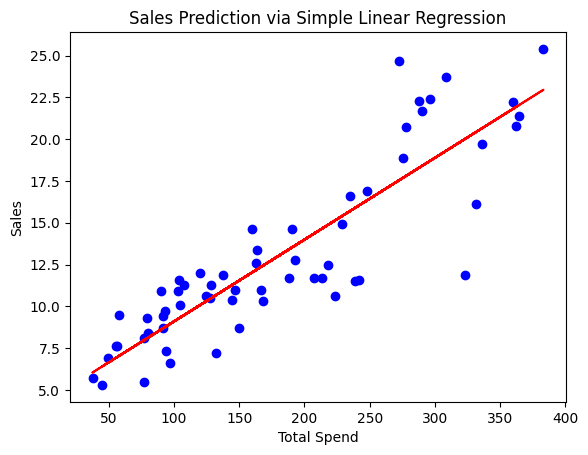

In [34]:
# plot the graph
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel("Total Spend")
plt.ylabel("Sales")
plt.title("Sales Prediction via Simple Linear Regression")